<a href="https://colab.research.google.com/github/Brianbrowncoopman/telecom_x/blob/master/telecom_x_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importacion**

In [203]:
import pandas as pd
import ast
from pandas import json_normalize
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

## **Extraccion**

In [35]:
df_datos_originales = pd.read_json('/content/TelecomX_Data.json' )

## ***Transformacion***

In [36]:
df_datos_originales.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [37]:
df_datos_originales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [38]:
print(df_datos_originales.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [39]:
pd.json_normalize(df_datos_originales['customerID'])
df_datos_originales.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [40]:
df = df_datos_originales.copy()

In [41]:
columnas_a_expandir = ['customer', 'phone', 'internet', 'account','account_Charges']

In [42]:
for col in columnas_a_expandir:
    df[col] = df[col].apply(lambda x: eval(x) if isinstance(x, str) else x)
    columnas_expandidas = df[col].apply(pd.Series)
    columnas_expandidas.columns = [f"{col}_{subcol}" for subcol in columnas_expandidas.columns]
    df = pd.concat([df.drop(columns=[col]), columnas_expandidas], axis=1)

df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [43]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [44]:
df.info()
df.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
6064,8276-MQBYC,Yes,Male,1,No,No,51,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,97.8,4913.3
1253,1794-HBQTJ,Yes,Female,0,No,No,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),48.6,48.6


In [45]:
df['account_Charges_Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: account_Charges_Total
Non-Null Count  Dtype 
--------------  ----- 
7267 non-null   object
dtypes: object(1)
memory usage: 56.9+ KB


In [46]:
df['account_Charges_Monthly'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: account_Charges_Monthly
Non-Null Count  Dtype  
--------------  -----  
7267 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [47]:
col_numericas = ['account_Charges_Total']

In [48]:
df['account_Charges_Total'].apply(lambda x: str(x).strip() == '').sum()

np.int64(11)

In [49]:
df['account_Charges_Total'] = df['account_Charges_Total'].apply(
    lambda x: 0 if str(x).strip() == '' else x
)

In [50]:
df[col_numericas] = df[col_numericas].astype(np.float64)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [52]:
df.head(2)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [53]:
df = df.applymap(lambda x: pd.NA if isinstance(x, str) and x.strip() == '' else x)

<ipython-input-53-1b5dd09b0cc2>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.NA if isinstance(x, str) and x.strip() == '' else x)


In [54]:
print(df.isnull().sum())

customerID                     0
Churn                        224
customer_gender                0
customer_SeniorCitizen         0
customer_Partner               0
customer_Dependents            0
customer_tenure                0
phone_PhoneService             0
phone_MultipleLines            0
internet_InternetService       0
internet_OnlineSecurity        0
internet_OnlineBackup          0
internet_DeviceProtection      0
internet_TechSupport           0
internet_StreamingTV           0
internet_StreamingMovies       0
account_Contract               0
account_PaperlessBilling       0
account_PaymentMethod          0
account_Charges_Monthly        0
account_Charges_Total          0
dtype: int64


In [55]:
df = df.dropna()

In [56]:
df['customer_tenure'] = pd.to_numeric(df['customer_tenure'], errors='coerce')
df['account_Charges_Monthly'] = pd.to_numeric(df['account_Charges_Monthly'], errors='coerce')
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype(int)

In [57]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [59]:
 df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30

In [60]:
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [61]:
df[['account_Charges_Monthly', 'Cuentas_Diarias']].head()

,account_Charges_Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [62]:
df.head(2)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

In [70]:
nombre_columnas = {
    "customerID": "ID_cliente",
    "Churn": "Abandono",
    "customer_gender": "Género_cliente",
    "customer_SeniorCitizen": "Cliente_adulto_mayor",
    "customer_Partner": "Pareja_del_cliente",
    "customer_Dependents": "Dependientes_del_cliente",
    "customer_tenure": "Antigüedad_cliente",
    "phone_PhoneService": "Servicio_telefónico",
    "phone_MultipleLines": "Líneas_múltiples",
    "internet_InternetService": "Servicio_Internet",
    "internet_OnlineSecurity": "Seguridad_en_línea",
    "internet_OnlineBackup": "Respaldo_online",
    "internet_DeviceProtection": "Protección_de_dispositivo",
    "internet_TechSupport": "Soporte_técnico",
    "internet_StreamingTV": "Transmisión_TV",
    "internet_StreamingMovies": "Transmisión_películas",
    "account_Contract": "Tipo_contrato",
    "account_PaperlessBilling": "Facturación_paperless",
    "account_PaymentMethod": "Método_pago",
    "account_Charges_Monthly": "Cargos_mensuales",
    "account_Charges_Total": "Cargos_totales",
    "Cuentas_Dianias": "Cuentas_Diarias"
}

In [71]:
df = df.rename(columns=nombre_columnas)

In [78]:
df.tail(2
        )

,ID_cliente,Abandono,Género_cliente,Cliente_adulto_mayor,Pareja_del_cliente,Dependientes_del_cliente,Antigüedad_cliente,Servicio_telefónico,Líneas_múltiples,Servicio_Internet,...,Protección_de_dispositivo,Soporte_técnico,Transmisión_TV,Transmisión_películas,Tipo_contrato,Facturación_paperless,Método_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60,1.966667


In [79]:
columnas_cambiar = [
    'Abandono',
    'Pareja_del_cliente', 'Dependientes_del_cliente', 'Servicio_telefónico',
    'Líneas_múltiples', 'Protección_de_dispositivo','Soporte_técnico', 'Transmisión_TV',
    'Transmisión_películas','Facturación_paperless',

]

In [80]:
df[columnas_cambiar] = df[columnas_cambiar].replace({'Yes': 1, 'No': 0})

<ipython-input-80-66f409239e2f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_cambiar] = df[columnas_cambiar].replace({'Yes': 1, 'No': 0})


In [83]:
df.head(5)

,ID_cliente,Abandono,Género_cliente,Cliente_adulto_mayor,Pareja_del_cliente,Dependientes_del_cliente,Antigüedad_cliente,Servicio_telefónico,Líneas_múltiples,Servicio_Internet,...,Protección_de_dispositivo,Soporte_técnico,Transmisión_TV,Transmisión_películas,Tipo_contrato,Facturación_paperless,Método_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [124]:
df['Soporte_técnico'] = (df['Soporte_técnico'].replace({'Yes': 1,'No': 0,'No internet service': 0}).fillna(0).astype(int))

In [122]:
df.head(2)

,ID_cliente,Abandono,Género_cliente,Cliente_adulto_mayor,Pareja_del_cliente,Dependientes_del_cliente,Antigüedad_cliente,Servicio_telefónico,Líneas_múltiples,Servicio_Internet,...,Protección_de_dispositivo,Soporte_técnico,Transmisión_TV,Transmisión_películas,Tipo_contrato,Facturación_paperless,Método_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667


In [151]:
df['Líneas_múltiples'] = (df['Líneas_múltiples'].replace({'Yes': 1,'No': 0,'No phone service': 0}).fillna(0).astype(int))

In [153]:
df['Seguridad_en_línea'] = (df['Seguridad_en_línea'].replace({'Yes': 1,'No': 0,'No internet service	': 0}).fillna(0))

In [154]:
df['Respaldo_online'] = (df['Respaldo_online'].replace({'Yes': 1,'No': 0,'No internet service	': 0}).fillna(0))

In [172]:
columnas_cambiar = [
    'Protección_de_dispositivo',
    'Transmisión_TV',
    'Transmisión_películas',
    'Respaldo_online',
    'Seguridad_en_línea'
]

In [173]:
reemplazo = {
    'Yes': 1,
    'No': 0,
    'No internet service': 0
}

In [174]:
df[columnas_cambiar] = df[columnas_cambiar].replace(reemplazo)


<ipython-input-174-06a3ccc23c4a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_cambiar] = df[columnas_cambiar].replace(reemplazo)


In [175]:
print(df[columnas_cambiar].value_counts())

Protección_de_dispositivo  Transmisión_TV  Transmisión_películas  Respaldo_online  Seguridad_en_línea
0                          0               0                      0                0                     2321
1                          1               1                      1                1                      376
                                                                                   0                      365
                                                                  0                0                      310
0                          1               1                      0                0                      289
                           0               0                      1                0                      273
                                                                  0                1                      252
                                           1                      0                0                      214
                  

In [176]:
df.head(1)

,ID_cliente,Abandono,Género_cliente,Cliente_adulto_mayor,Pareja_del_cliente,Dependientes_del_cliente,Antigüedad_cliente,Servicio_telefónico,Líneas_múltiples,Servicio_Internet,...,Protección_de_dispositivo,Soporte_técnico,Transmisión_TV,Transmisión_películas,Tipo_contrato,Facturación_paperless,Método_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667


In [177]:
df_limpio = df.copy()

In [178]:
df.to_csv('df_limpio.csv', index=False)

In [179]:
df.to_html('df_limpio.html', index=False)

In [180]:
df_1 = df.iloc[:, :7]
df_1.head(1)

,ID_cliente,Abandono,Género_cliente,Cliente_adulto_mayor,Pareja_del_cliente,Dependientes_del_cliente,Antigüedad_cliente
0,0002-ORFBO,0,Female,0,1,1,9


data frame del cliente en relacion a grupo familiar

In [181]:
columnas_seleccionadas = [df.columns[0], df.columns[1],df.columns[6],df.columns[7],df.columns[8],df.columns[9],df.columns[10],df.columns[11],df.columns[12],df.columns[13],df.columns[14],df.columns[15],df.columns[16],df.columns[17],df.columns[18],df.columns[19],df.columns[20],df.columns[21]]


In [110]:
columnas_seleccionadas

['ID_cliente',
 'Abandono',
 'Antigüedad_cliente',
 'Servicio_telefónico',
 'Líneas_múltiples',
 'Servicio_Internet',
 'Seguridad_en_línea',
 'Respaldo_online',
 'Protección_de_dispositivo',
 'Soporte_técnico',
 'Transmisión_TV',
 'Transmisión_películas',
 'Tipo_contrato',
 'Facturación_paperless',
 'Método_pago',
 'Cargos_mensuales',
 'Cargos_totales',
 'Cuentas_Diarias']

In [182]:
df_2 = df[columnas_seleccionadas]

In [183]:
df_2.head(1)

,ID_cliente,Abandono,Antigüedad_cliente,Servicio_telefónico,Líneas_múltiples,Servicio_Internet,Seguridad_en_línea,Respaldo_online,Protección_de_dispositivo,Soporte_técnico,Transmisión_TV,Transmisión_películas,Tipo_contrato,Facturación_paperless,Método_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0002-ORFBO,0,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667


### ***Data frame limpio para uso***

In [184]:
df.head(1)

,ID_cliente,Abandono,Género_cliente,Cliente_adulto_mayor,Pareja_del_cliente,Dependientes_del_cliente,Antigüedad_cliente,Servicio_telefónico,Líneas_múltiples,Servicio_Internet,...,Protección_de_dispositivo,Soporte_técnico,Transmisión_TV,Transmisión_películas,Tipo_contrato,Facturación_paperless,Método_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667


### ***data frame simplificado_1***

In [185]:
df_1.head(1)

,ID_cliente,Abandono,Género_cliente,Cliente_adulto_mayor,Pareja_del_cliente,Dependientes_del_cliente,Antigüedad_cliente
0,0002-ORFBO,0,Female,0,1,1,9


In [186]:
df_1.to_csv('df_limpio_1.csv', index=False)

In [187]:
df_1.to_html('df_limpio_1.html', index=False)

### ***data frame simplificado_2***

In [188]:
df_2.head(1)

,ID_cliente,Abandono,Antigüedad_cliente,Servicio_telefónico,Líneas_múltiples,Servicio_Internet,Seguridad_en_línea,Respaldo_online,Protección_de_dispositivo,Soporte_técnico,Transmisión_TV,Transmisión_películas,Tipo_contrato,Facturación_paperless,Método_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0002-ORFBO,0,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667


In [191]:
df_2.to_csv('df_limpio_2.csv', index=False)

In [192]:
df_2.to_html('df_limpio_2.html', index=False)

## ***Carga y analisis***

In [194]:
df

,ID_cliente,Abandono,Género_cliente,Cliente_adulto_mayor,Pareja_del_cliente,Dependientes_del_cliente,Antigüedad_cliente,Servicio_telefónico,Líneas_múltiples,Servicio_Internet,...,Protección_de_dispositivo,Soporte_técnico,Transmisión_TV,Transmisión_películas,Tipo_contrato,Facturación_paperless,Método_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_cliente                 7043 non-null   object 
 1   Abandono                   7043 non-null   int64  
 2   Género_cliente             7043 non-null   object 
 3   Cliente_adulto_mayor       7043 non-null   int64  
 4   Pareja_del_cliente         7043 non-null   int64  
 5   Dependientes_del_cliente   7043 non-null   int64  
 6   Antigüedad_cliente         7043 non-null   int64  
 7   Servicio_telefónico        7043 non-null   int64  
 8   Líneas_múltiples           7043 non-null   int64  
 9   Servicio_Internet          7043 non-null   object 
 10  Seguridad_en_línea         7043 non-null   int64  
 11  Respaldo_online            7043 non-null   int64  
 12  Protección_de_dispositivo  7043 non-null   int64  
 13  Soporte_técnico            7043 non-null   int64  
 1

In [197]:
df.describe()

,Abandono,Cliente_adulto_mayor,Pareja_del_cliente,Dependientes_del_cliente,Antigüedad_cliente,Servicio_telefónico,Líneas_múltiples,Seguridad_en_línea,Respaldo_online,Protección_de_dispositivo,Soporte_técnico,Transmisión_TV,Transmisión_películas,Facturación_paperless,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


#### ***distribución de evasión (Churn)***

<ipython-input-199-8f2fab953be0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Abandono', palette='Set2')


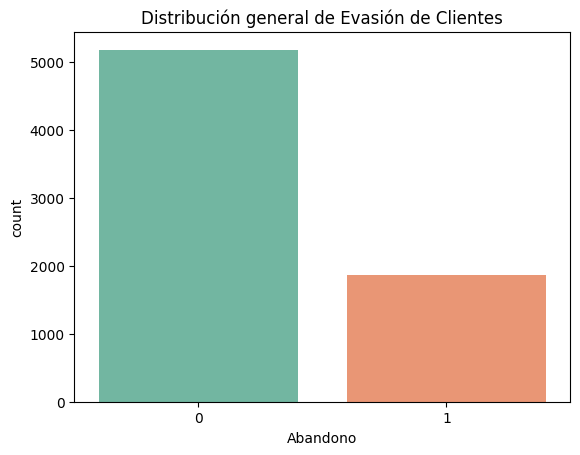

In [199]:
sns.countplot(data=df, x='Abandono', palette='Set2')
plt.title('Distribución general de Evasión de Clientes')
plt.show()

#### ***Gráfico de barras comparativo***

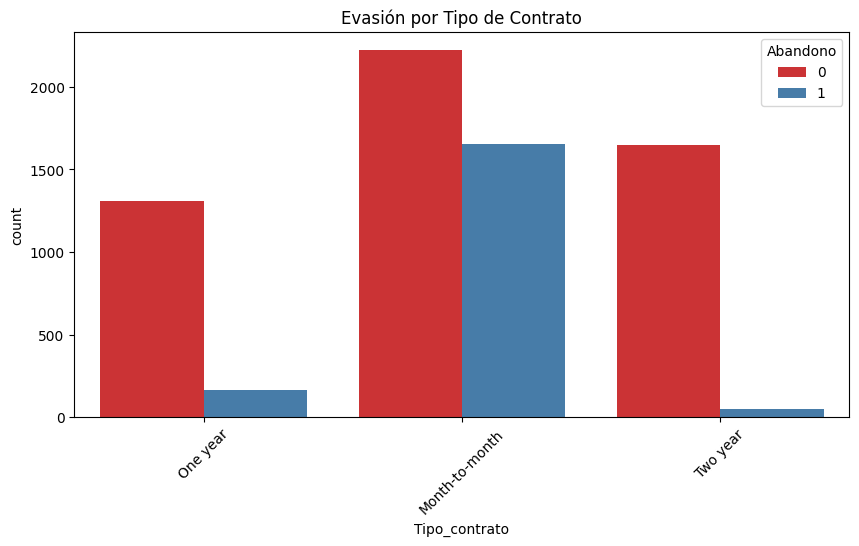

In [201]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Tipo_contrato', hue='Abandono', palette='Set1')
plt.title('Evasión por Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()

#### ***Gráfico de línea: Evasión según antigüedad***

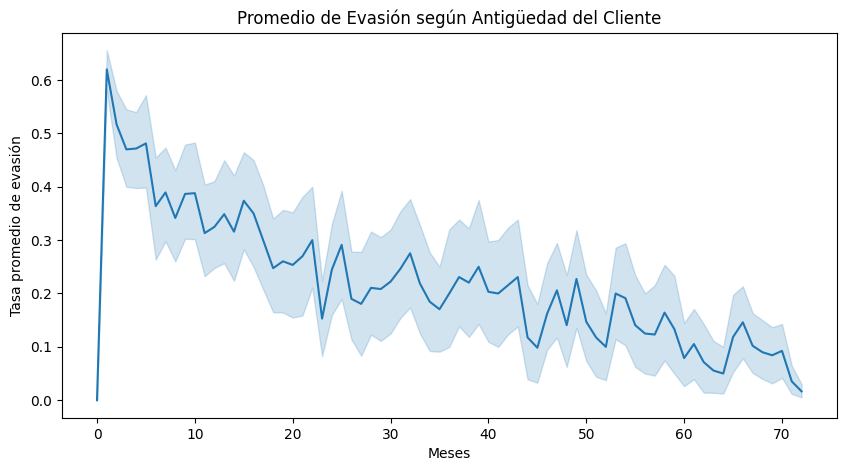

In [202]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Antigüedad_cliente', y='Abandono', estimator='mean')
plt.title('Promedio de Evasión según Antigüedad del Cliente')
plt.xlabel('Meses')
plt.ylabel('Tasa promedio de evasión')
plt.show()

#### ***Gráfico combinado con varias líneas***

In [209]:
df['Abandono'] = df['Abandono'].replace({'Yes': 1, 'No': 0})

# Agrupaciones
abandono_tenure = df.groupby('Antigüedad_cliente')['Abandono'].mean()
abandono_cargos = df.groupby('Cargos_mensuales')['Abandono'].mean().sort_index().head(50)
abandono_senior = df.groupby('Cliente_adulto_mayor')['Abandono'].mean()
abandono_internet = df.groupby('Servicio_Internet')['Abandono'].mean()

# Subgráficos
fig = make_subplots(rows=2, cols=2, subplot_titles=[
    'Antigüedad_cliente', 'Cargos_mensuales', 'Cliente_adulto_mayor', 'Servicio_Internet'])

# Línea 1
fig.add_trace(go.Scatter(x=abandono_tenure.index, y=abandono_tenure.values, mode='lines+markers', name='Antigüedad'),
              row=1, col=1)

# Línea 2
fig.add_trace(go.Scatter(x=abandono_cargos.index, y=abandono_cargos.values, mode='lines+markers', name='Cargos'),
              row=1, col=2)

# Línea 3
fig.add_trace(go.Scatter(x=abandono_senior.index.astype(str), y=abandono_senior.values, mode='lines+markers', name='Adulto Mayor'),
              row=2, col=1)

# Línea 4
fig.add_trace(go.Scatter(x=abandono_internet.index, y=abandono_internet.values, mode='lines+markers', name='Internet'),
              row=2, col=2)

fig.update_layout(height=800, width=1000, title_text='Análisis de Churn por variables clave', template='plotly_white')
fig.show()